# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import math
import seaborn as sns
import scipy


colors = sns.color_palette("hls", 8)   # Colors
title_size = 16                        # Size title
axis_size = 14                         # Size axis label
value_size = 10                        # Size values on axis
legend_size = 12                       # Size legend

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$


## Exercise 05.1
### Assignment


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?

### Resolution

Metropolis algorithm is able to sample any density function regardless of analytic complexity in any number of dimensions. Essentially, the algorithm consists of generating a new position $x$ from the current one $y$ and calculating the acceptance rate:

$$A = \min {\left[1, \frac{T(y|x)p(x)}{T(x|y)p(y)}\right]} = \min {\left[1, \frac{p(x)}{p(y)}\right]}$$

where $p(x)$ is the probability distribution and $T(y|x)$ is the probability transition that is neglected because it is symmetric. Hence, Metropolis' acceptance rule states that a proposed move is accepted with probability 1 if the probability of the new position $p(x)$ is greater than or equal to the probability of the current position $p(y)$. Otherwise, the move is accepted with probability $\frac{p(x)}{p(y)}$.

In this exercise, $p(x)$ is given by the square modulus of the wave function $|\Psi(\vec{r},t)|^2$, and the new positions are given through a uniform transition probability ($x = y + \Delta x$ in each direction where $\Delta x$ was generated random in $(-\delta, \delta)$) and a Gaussian transition probability centered in the previous position.

I implemented the Metropolis algorithm in the `Posizione_metropolis()` function:

```cpp
Posizione metropolis (Random& rn, Posizione& x, int type_wf, int type_T, double& parameter, double& acc)
{
	Posizione x_2;
	if (type_T == 0)	// New point uniformly distributed
	{
		x_2.SetX(x.GetX() + rn.Rannyu(-parameter, parameter));
		x_2.SetY(x.GetY() + rn.Rannyu(-parameter, parameter));
		x_2.SetZ(x.GetZ() + rn.Rannyu(-parameter, parameter));
	}
	else if (type_T == 1)	// New point gaussian distributed
	{
		x_2.SetX(x.GetX() + rn.Gauss(0., parameter));
		x_2.SetY(x.GetY() + rn.Gauss(0., parameter));
		x_2.SetZ(x.GetZ() + rn.Gauss(0., parameter));
	}
	else
	{
		cout << "Tipo probabilità di transizione non nota" << endl;		
		exit(1);
	}
		
	// Acceptance probability
	double A = min(1., norm(wave_function(x_2, type_wf)) / norm(wave_function(x, type_wf)));
	
	// Accept new point with probability A
	if (rn.Rannyu() <= A)
	{
		acc ++; 	// Increase number of accepted trasitions
		return x_2;
	}
	else
		return x;
}
```

where `double wave_function()` function returns square modulus of the wave function. 

If the moves proposed by the Metropolis algorithm are similar to the previous step, they will be easily accepted but may be highly correlated. Conversely, moves that are too large will likely be uncorrelated but could result in a low acceptance rate, thus compromising the efficiency of the algorithm. Therefore, I have adopted the empirical 50% rule, that states that the algorithm operates optimally when moves are accepted 50% of the time and rejected 50% of the time. To find the values of the step in uniform transition probability and the variance in Gaussian transition probability that give 50% of acceptance I used `double rule_50()` function, that uses a bisection method:

```cpp
double rule_50(int type_wf, int type_T)
{
	//...//
	double max = 3.;	// Max value
	double min= 0.;		// Min value
	double accepted_max = calc_accepted(type_wf, type_T, max);  // Acceptation with max value 
	double accepted_min = calc_accepted(type_wf, type_T, min);	// Acceptation with min value 
	double step;		// Value to control
	double accepted; 	// Acceptation
	//...//
	// Loop to find the value to have 50% of acceptation
	while(abs(accepted - 0.5) > 10e-4 && abs(accepted_max - accepted_min) > 10e-4)  // Loop stops when the value goes under a fixed precision
	{
		step = (max + min) / 2; 	 						// Mid point
		accepted = calc_accepted(type_wf, type_T, step); 	// Acceptation mid point
		//...//
		// Find the new subinterval in which search between the one on the right and on the left of the mid point
		double accepted_1 = calc_accepted(type_wf, type_T, (min + step) / 2);
		double accepted_2 = calc_accepted(type_wf, type_T, (max + step) / 2);

		if (abs(accepted_1 - 0.5) < abs(accepted_2 - 0.5))  // Choose the subinterval with the nearest value to 50%
		{
			max = step;
			accepted_max = accepted;

		}
		else
		{
			min = step;
			accepted_min = accepted;
		}
	}
	return step;
}
```

With this algorithmit, it was found that to obtain a 50% acceptance rate for the uniform transition probability $\delta = 1.225$ is used for $\Psi_{1,0,0}(x,y,z)$ and $\delta = 2.977$ for $\Psi_{2,1,0}(x,y,z)$ and for gaussian transition probability $\sigma = 0.762$ is use for $\Psi_{1,0,0}(x,y,z)$ and $\sigma = 1.875$ for $\Psi_{2,1,0}(x,y,z)$. 

<Figure size 1600x400 with 0 Axes>

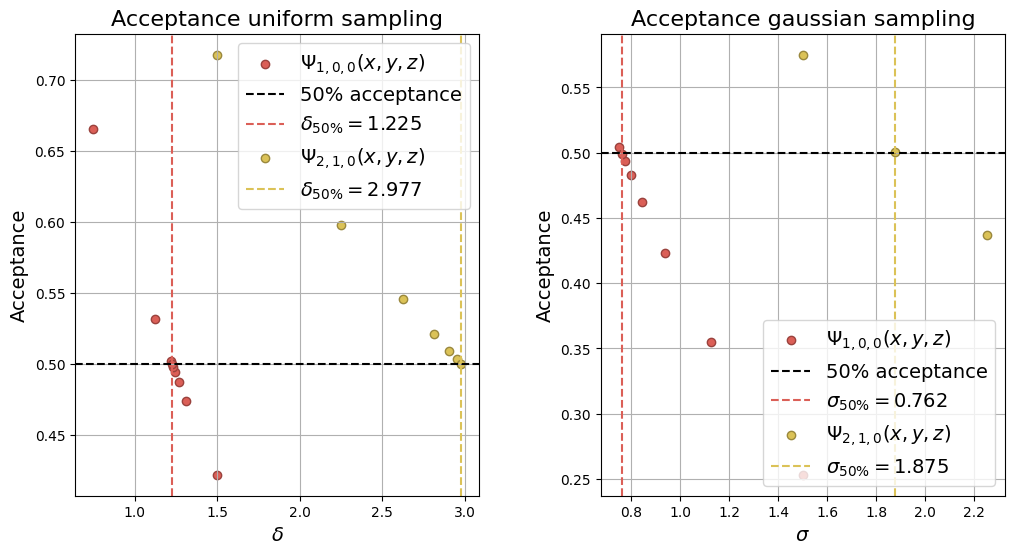

In [14]:
# Plot acceptance
plt.figure(figsize=(16, 4))
path = "../E05/Data/accepted_"   # Path to data
wf = [r"$\Psi_{1,0,0}(x,y,z)$", r"$\Psi_{2,1,0}(x,y,z)$"]  # Wave function
sample = ["uniform", "gaussian"]

plt.figure(figsize=(12, 6))

for i in range(len(sample)):      # Loop over the wave functions
    for j in range(len(wf)):
        df = pd.read_csv(path + str(j) + "_" + str(i) + ".dat", sep=' ') # Read data
        plt.subplot(1, len(wf), i + 1)
        plt.scatter(df["STEP"], df["ACCEP"], color = colors[j], marker='o', edgecolors=tuple(np.array(colors[j]) * 0.7), label=wf[j])
        if j == 0:
            plt.axhline(y=0.5, color='black', linestyle='--', label=r"50% acceptance")
        plt.title("Acceptance " + sample[i] + " sampling", fontsize=title_size)
        if i == 0:
            plt.axvline(x=df["STEP"][len(df) - 1], color=colors[j], linestyle='--', label=r"$\delta_{50\%} = $" + str(round(df["STEP"][len(df) - 1], 3)))
            plt.xlabel(r'$\delta$', fontsize=axis_size)
        if i == 1:
            plt.axvline(x=df["STEP"][len(df) - 1], color=colors[j], linestyle='--', label=r"$\sigma_{50\%} = $" + str(round(df["STEP"][len(df) - 1], 3)))
            plt.xlabel(r'$\sigma$', fontsize=axis_size)
        plt.ylabel('Acceptance', fontsize=axis_size)
        plt.legend(fontsize=axis_size)
        plt.tick_params(axis='both', which='major', labelsize=value_size)
        plt.grid(True)

plt.subplots_adjust(wspace = 0.3)
plt.show()

Using the values of $\delta$ and $\sigma$ found, I checked the values of acceptance using data blocking. All the acceptance rates are close to 50%, but only the acceptance rate of $\Psi_{1,0,0}$ uniformly sampled is compatible with the desidered acceptance rate.

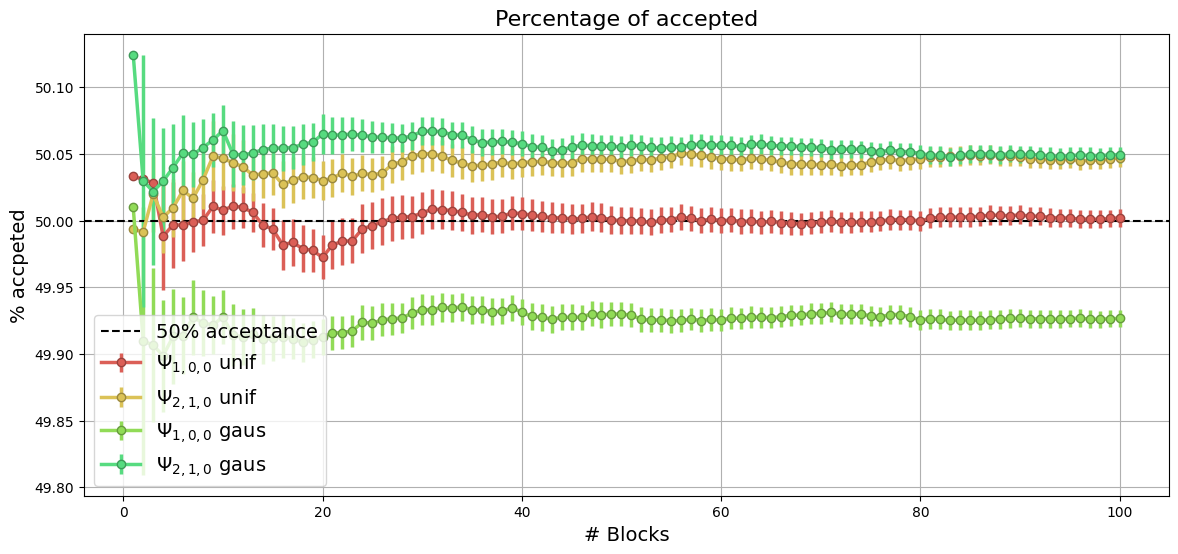

In [3]:
# Data import call
df_1 = pd.read_csv('../E05/Data/accep_0.dat', delimiter=' ')
df_2 = pd.read_csv('../E05/Data/accep_1.dat', delimiter=' ')

#Plot r_mean
plt.figure(figsize=(14, 6))
plt.errorbar(df_1['#Blocks'], (df_1['mean_acc_unif']) * 100, yerr = df_1['uncer_acc_unif'] * 100, color = colors[0], marker='o', mec=tuple(np.array(colors[0]) * 0.7), linewidth=2.5, label=r"$\Psi_{1,0,0}$ unif")
plt.errorbar(df_2['#Blocks'], (df_2['mean_acc_unif']) * 100, yerr = df_2['uncer_acc_unif'] * 100, color = colors[1], marker='o', mec=tuple(np.array(colors[1]) * 0.7), linewidth=2.5, label=r"$\Psi_{2,1,0}$ unif")
plt.errorbar(df_1['#Blocks'], (df_1['mean_acc_gaus']) * 100, yerr = df_1['uncer_acc_gaus'] * 100, color = colors[2], marker='o', mec=tuple(np.array(colors[2]) * 0.7), linewidth=2.5, label=r"$\Psi_{1,0,0}$ gaus")
plt.errorbar(df_2['#Blocks'], (df_2['mean_acc_gaus']) * 100, yerr = df_2['uncer_acc_gaus'] * 100, color = colors[3], marker='o', mec=tuple(np.array(colors[3]) * 0.7), linewidth=2.5, label=r"$\Psi_{2,1,0}$ gaus")
plt.axhline(y=50, color='black', linestyle='--', label=r"50% acceptance")
plt.title(r"Percentage of accepted", fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
plt.ylabel(r'% accpeted', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=axis_size)
plt.grid(True)

I sample $M = 10^4$ points distributed in 3D space according to the square modulus of the wave function $|\Psi(x,y,z)|^2$. 
As seen in the plots, the distributions depict the shapes of the hydrogen atom orbitals.

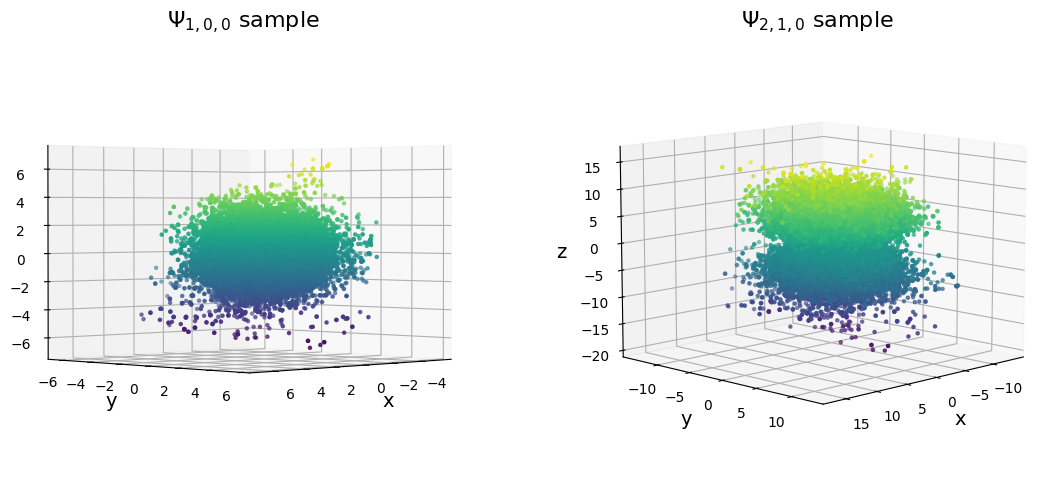

In [4]:
# Data import call
df_1 = pd.read_csv('../E05/Data/data_graf_0.dat', delimiter=' ')
df_2 = pd.read_csv('../E05/Data/data_graf_1.dat', delimiter=' ')

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df_1["x"], df_1["y"], df_1["z"], c=df_1["z"], marker='.')
ax1.set_xlabel('x', fontsize=axis_size)
ax1.set_ylabel('y', fontsize=axis_size)
ax1.set_zlabel('z', fontsize=axis_size)
ax1.set_title(r"$\Psi_{1,0,0}$ sample", fontsize=title_size)
ax1.view_init(elev=1, azim=45)  # Cambia la vista del grafico
ax1.tick_params(axis='both', which='major', labelsize=value_size)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(df_2["x"], df_2["y"], df_2["z"], c=df_2["z"], marker='.')
ax2.set_xlabel('x', fontsize=axis_size)
ax2.set_ylabel('y', fontsize=axis_size)
ax2.set_zlabel('z', fontsize=axis_size)
ax2.set_title(r"$\Psi_{2,1,0}$ sample", fontsize=title_size)
ax2.view_init(elev=10, azim=45)  # Cambia la vista del grafico
ax2.tick_params(axis='both', which='major', labelsize=value_size)

plt.tight_layout()
plt.show()

Using the values of $\delta$ and $\sigma$ that yield a 50% acceptance rate, I measured the mean radial positions using data blocking with $N_{blocks} = 100$ and $N_{steps} = 10^5$ for each block, following an initial equilibration phase with 10 blocks. I chose the starting position in the origin.

All mean radial positions obtained are compatible with the expected values for both uniform and Gaussian sampling methods.

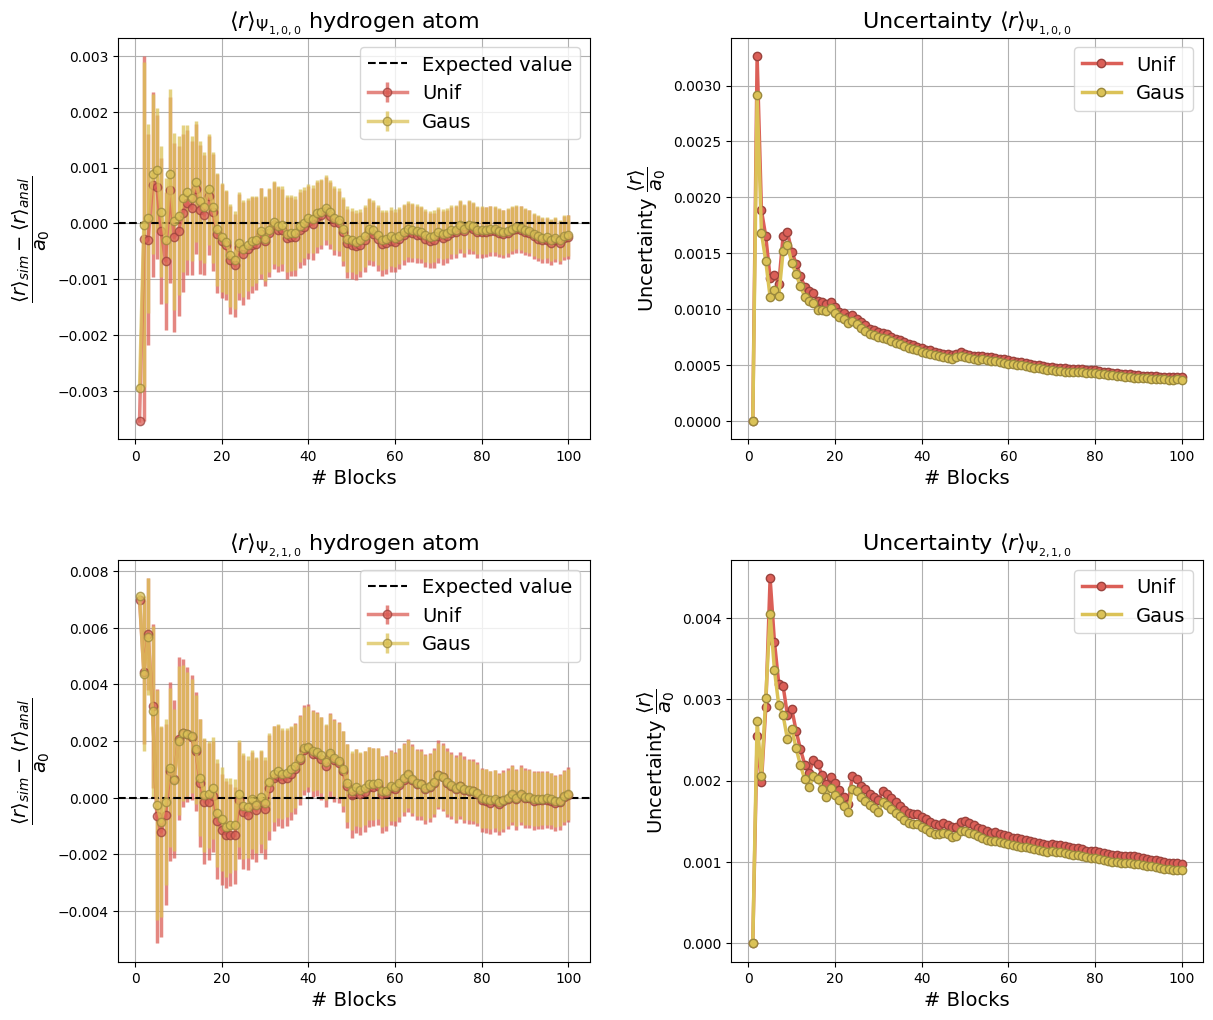

In [13]:
wf = [r"$\left<r\right>_{\Psi_{1,0,0}}$", r"$\left<r\right>_{\Psi_{2,1,0}}$"]  # Wave function
true_value = [1.5, 5]  # True value of r

plt.figure(figsize=(14, 12))

for i in range(len(wf)):
    df = pd.read_csv('../E05/Data/r_' + str(i) +'.dat', delimiter=' ')
    
    plt.subplot(2, 2, 2 * i + 1)
    plt.errorbar(df['#Blocks'], df['mean_unif'] - true_value[i], yerr = df['uncer_unif'], color = colors[0], marker='o', mec=tuple(np.array(colors[0]) * 0.7), linewidth=2.5, alpha = 0.75, label="Unif")
    plt.errorbar(df['#Blocks'], df['mean_gaus'] - true_value[i], yerr = df['uncer_gaus'], color = colors[1], marker='o', mec=tuple(np.array(colors[1]) * 0.7), linewidth=2.5, alpha = 0.75, label="Gaus")
    plt.axhline(y=0, color='black', linestyle='--', label="Expected value")
    plt.title(wf[i] + " hydrogen atom", fontsize=title_size)
    plt.xlabel('# Blocks', fontsize=axis_size)
    plt.ylabel(r'$\dfrac{\left\langle r \right\rangle_{sim}-\left\langle r \right\rangle_{anal}}{a_0}$', fontsize=axis_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.legend(fontsize=axis_size)
    plt.grid(True)

    plt.subplot(2, 2, 2 * i + 2)
    plt.plot(df['#Blocks'], df['uncer_unif'], color = colors[0], marker='o', mec=tuple(np.array(colors[0]) * 0.7), linewidth=2.5, label="Unif")
    plt.plot(df['#Blocks'], df['uncer_gaus'], color = colors[1], marker='o', mec=tuple(np.array(colors[1]) * 0.7), linewidth=2.5, label="Gaus")
    plt.title("Uncertainty " +  wf[i], fontsize=title_size)
    plt.xlabel('# Blocks', fontsize=axis_size)
    plt.ylabel(r'Uncertainty $\dfrac{\left\langle r \right\rangle}{a_0}$', fontsize=axis_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.legend(fontsize=axis_size)
    plt.grid(True)

plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()



I repeated the measurement in the same conditions but with different numbers of steps in each block, varying $N_{steps}\in\left[10^2; 10^6\right]$. 

With $N_{steps} = 10^2$,  the radial position is near but not compatible with the expected values. Already with $N_{steps} = 10^3$, the radial position is compatible with the expected values. Increasing the number of steps causes the mean to converge more rapidly to the expected values.

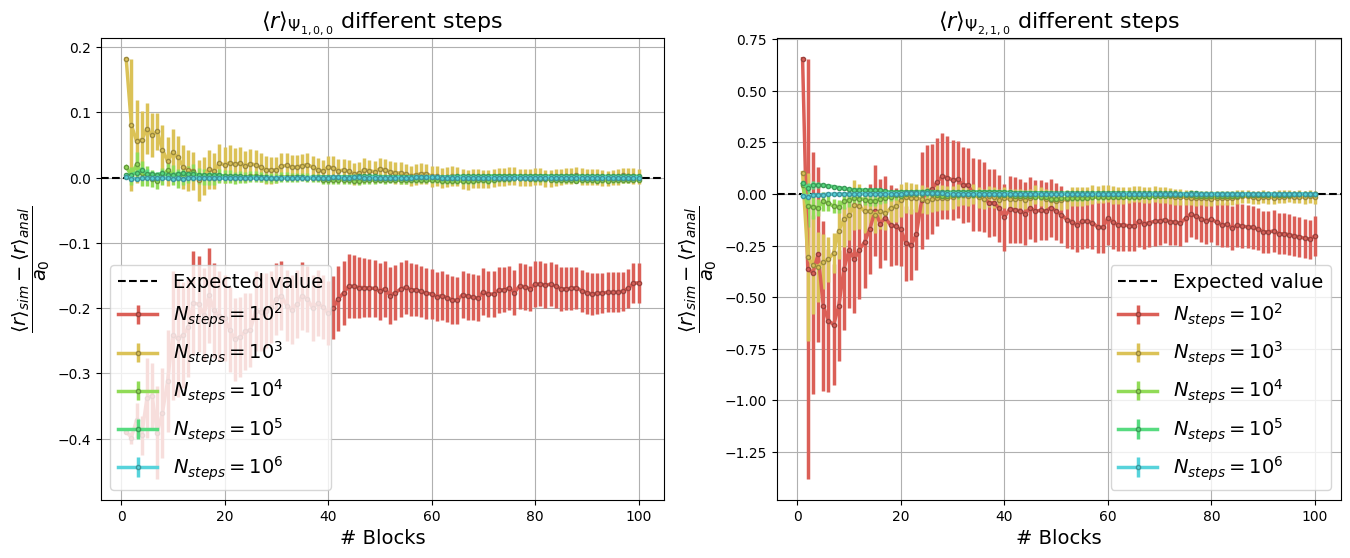

In [16]:
plt.figure(figsize=(16,6))

for i in range(2, 7):
    df = pd.read_csv('../E05/Data/data_steps_' + str(i) + '.dat', delimiter=' ')
    plt.subplot(1, 2, 1)
    plt.errorbar(df['#Blocks'], (df['mean_1'] - 1.5), yerr = df['uncer_1'], color = colors[i-2], marker='.', mec=tuple(np.array(colors[i-2]) * 0.7), linewidth=2.5, label=r"$N_{steps} = 10^{" + str(i) + "}$")
    plt.subplot(1, 2, 2)
    plt.errorbar(df['#Blocks'], (df['mean_2'] - 5), yerr = df['uncer_2'], color = colors[i-2], marker='.', mec=tuple(np.array(colors[i-2]) * 0.7), linewidth=2.5, label=r"$N_{steps} = 10^{" + str(i) + "}$")
    
plt.subplot(1, 2, 1)
plt.axhline(y=0, color='black', linestyle='--', label="Expected value")
plt.title(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ different steps", fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
plt.ylabel(r'$\dfrac{\left\langle r \right\rangle_{sim}-\left\langle r \right\rangle_{anal}}{a_0}$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=axis_size)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.axhline(y=0, color='black', linestyle='--', label="Expected value")
plt.title(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ different steps", fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
plt.ylabel(r'$\dfrac{\left\langle r \right\rangle_{sim}-\left\langle r \right\rangle_{anal}}{a_0}$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=axis_size)
plt.grid(True)

I repeated the measurement under the same conditions but with different starting points ($d$ is the distance from the origin).

For $\Psi_{1,1,0}(x,y,z)$, I varied the starting point along the x-axis due to the spherical symmetry of the wave function. Until $d=250 \ a_0$, the radial position is close to the expected value but not compatible with it starting from $d=100 \ a_0$. From $d=500 \ a_0$ onwards, the mean radial position is increasingly diverging from the expected value.

For $\Psi_{2,1,0}(x,y,z)$, I varied the starting point along the x-axis and along the z-axis due to the cylindrical symmetry of the wave function. Along both axes, compared to $\Psi_{1,1,0}(x,y,z)$ it can start from further away. Specifically, until $d=750 \ a_0$, the radial position remains close to the expected value but not compatible with it starting from $d=100 \ a_0$. At $d=1000 \ a_0$, the radial position is far from the expected value.

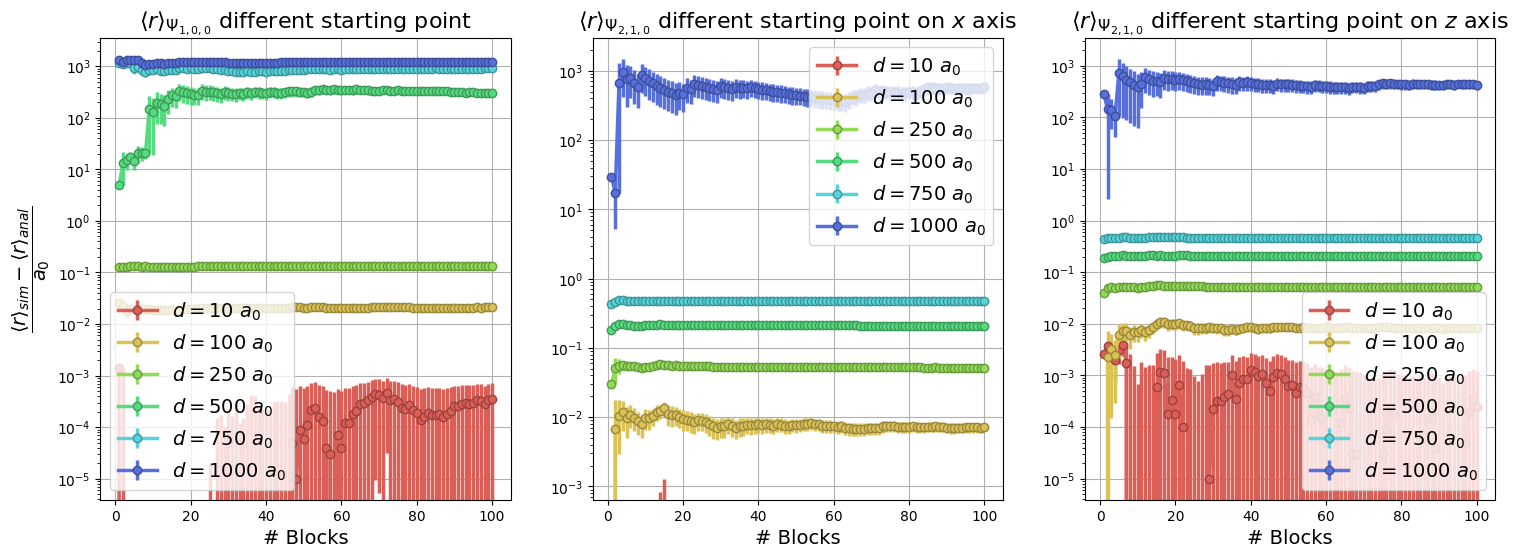

In [51]:
plt.figure(figsize=(18,6))

data = [10, 100, 250, 500, 750, 1000] 

for i in range(0, 6):
    df = pd.read_csv('../E05/Data/data_pos_' + str(i) + '.dat', delimiter=' ')
    plt.subplot(1, 3, 1)
    plt.errorbar(df['#Blocks'], (df['mean_1'] - 1.5), yerr = df['uncer_1'], color = colors[i], marker='o', mec=tuple(np.array(colors[i]) * 0.7), linewidth=2.5, label=r"$d = " + str(data[i]) + "\ a_0$")
    plt.subplot(1, 3, 2)
    plt.errorbar(df['#Blocks'], (df['mean_2'] - 5), yerr = df['uncer_2'], color = colors[i], marker='o', mec=tuple(np.array(colors[i]) * 0.7), linewidth=2.5, label=r"$d = " + str(data[i]) + " \ a_0$")
    plt.subplot(1, 3, 3)
    plt.errorbar(df['#Blocks'], (df['mean_3'] - 5), yerr = df['uncer_3'], color = colors[i], marker='o', mec=tuple(np.array(colors[i]) * 0.7), linewidth=2.5, label=r"$d = " + str(data[i]) + " \ a_0$")
    
plt.subplot(1, 3, 1)
plt.title(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ different starting point", fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
plt.ylabel(r'$\dfrac{\left\langle r \right\rangle_{sim}-\left\langle r \right\rangle_{anal}}{a_0}$', fontsize=axis_size)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=axis_size)
plt.grid(True)

plt.subplot(1, 3, 2)
plt.title(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ different starting point on $x$ axis", fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
#plt.ylabel(r'$\dfrac{\left\langle r \right\rangle_{sim}-\left\langle r \right\rangle_{anal}}{a_0}$', fontsize=axis_size)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=axis_size)
plt.grid(True)

plt.subplot(1, 3, 3)
plt.title(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ different starting point on $z$ axis", fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
#plt.ylabel(r'$\dfrac{\left\langle r \right\rangle_{sim}-\left\langle r \right\rangle_{anal}}{a_0}$', fontsize=axis_size)
plt.yscale('log')
plt.legend(fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.grid(True)

plt.subplots_adjust(wspace = 0.2)
plt.show()